The average delivery time for n = 1000
r = 0.0, average navigation length = 103.256
r = 0.1, average navigation length = 95.426
r = 0.2, average navigation length = 87.77
r = 0.30000000000000004, average navigation length = 79.72
r = 0.4, average navigation length = 69.868
r = 0.5, average navigation length = 69.248
r = 0.6000000000000001, average navigation length = 64.334
r = 0.7000000000000001, average navigation length = 59.23
r = 0.8, average navigation length = 58.506
r = 0.9, average navigation length = 57.154
r = 1.0, average navigation length = 58.02
r = 1.1, average navigation length = 65.072
r = 1.2000000000000002, average navigation length = 72.766
r = 1.3, average navigation length = 87.754
r = 1.4000000000000001, average navigation length = 101.316
r = 1.5, average navigation length = 125.114
r = 1.6, average navigation length = 167.616
r = 1.7000000000000002, average navigation length = 193.664
r = 1.8, average navigation length = 242.662
r = 1.9000000000000001, average 

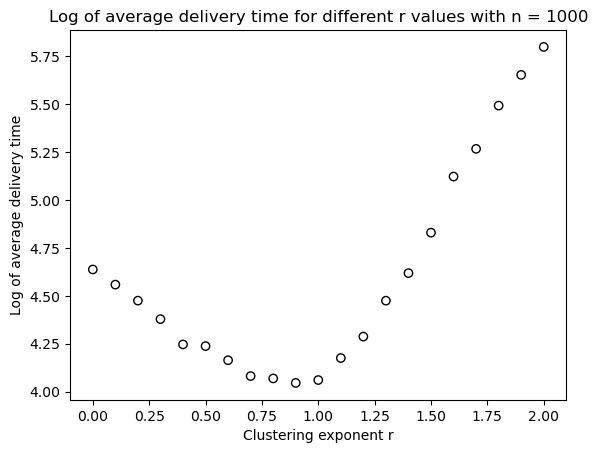

The average delivery time for n = 5000
r = 0.0, average navigation length = 252.116
r = 0.1, average navigation length = 224.38
r = 0.2, average navigation length = 194.656
r = 0.30000000000000004, average navigation length = 173.888
r = 0.4, average navigation length = 152.376
r = 0.5, average navigation length = 131.938
r = 0.6000000000000001, average navigation length = 117.996
r = 0.7000000000000001, average navigation length = 103.986
r = 0.8, average navigation length = 97.082
r = 0.9, average navigation length = 96.724
r = 1.0, average navigation length = 99.036
r = 1.1, average navigation length = 108.324
r = 1.2000000000000002, average navigation length = 128.258
r = 1.3, average navigation length = 163.392
r = 1.4000000000000001, average navigation length = 218.406
r = 1.5, average navigation length = 319.456
r = 1.6, average navigation length = 441.402
r = 1.7000000000000002, average navigation length = 632.568
r = 1.8, average navigation length = 849.31
r = 1.90000000000000

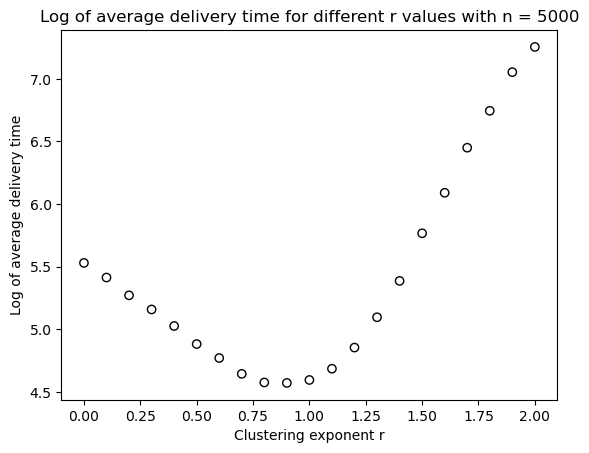

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

def create_grid(n):
    """Create a 2D grid with n x n nodes."""
    return [(i, j) for i in range(n) for j in range(n)]

def manhattan_distance(node1, node2):
    """Calculate the Manhattan distance on a 2D grid."""
    x1, y1 = node1
    x2, y2 = node2
    return abs(x1 - x2) + abs(y1 - y2)

def precompute_probabilities(n, r):
    """Precompute probabilities for long-range connections based on distance."""
    distances = list(range(1, 2 * n))
    probabilities = [d ** -r for d in distances]
    total = sum(probabilities)
    probabilities = [p / total for p in probabilities]
    return distances, probabilities

def generate_long_range_edge(node, distances, probabilities, n):
    """Generate a long-range edge for a given node."""
    distance = random.choices(distances, probabilities)[0]
    direction = random.choice(['horizontal', 'vertical'])
    x, y = node
    if direction == 'horizontal':
        target_y = y + distance if random.random() > 0.5 else y - distance
        target_y = max(0, min(n - 1, target_y))  # Ensure target is within grid
        target = (x, target_y)
    else:
        target_x = x + distance if random.random() > 0.5 else x - distance
        target_x = max(0, min(n - 1, target_x))  # Ensure target is within grid
        target = (target_x, y)
    return target

def navigate_with_custom_strategy(grid, distances, probabilities, start, end, n):
    """Navigate from start to end using the custom strategy."""
    current = start
    visited = set()
    steps = 0
    while current != end:
        visited.add(current)
        x, y = current
        neighbors = [(x, y-1), (x, y+1), (x-1, y), (x+1, y)]
        neighbors = [(i, j) for i, j in neighbors if 0 <= i < n and 0 <= j < n]  # Ensure within grid
        long_range_target = generate_long_range_edge(current, distances, probabilities, n)
        neighbors.append(long_range_target)
        neighbors = [neighbor for neighbor in neighbors if neighbor not in visited]
        if not neighbors:
            return float('inf')
        current = min(neighbors, key=lambda neighbor: manhattan_distance(neighbor, end))
        steps += 1
    return steps

def run_simulation(n, r, trials=500):
    """Run the simulation for a given grid size, clustering exponent, and number of trials."""
    grid = create_grid(n)
    distances, probabilities = precompute_probabilities(n, r)
    total_length = 0
    for _ in range(trials):
        start = (random.randint(0, n-1), random.randint(0, n-1))
        end = (random.randint(0, n-1), random.randint(0, n-1))
        while start == end:
            end = (random.randint(0, n-1), random.randint(0, n-1))
        length = navigate_with_custom_strategy(grid, distances, probabilities, start, end, n)
        total_length += length
    average_length = total_length / trials
    return average_length

n_array = [1000, 5000]
for n in n_array:
    r_values = np.linspace(0, 2, 21)
    results = []
    print(f"The average delivery time for n = {n}")
    for r in r_values:
        avg_length = run_simulation(n, r)
        results.append((r, avg_length))
        print(f"r = {r}, average navigation length = {avg_length}")

    # Plotting the results
    rs, lengths = zip(*results)
    log_lengths = np.log(lengths)
    plt.scatter(rs, log_lengths, facecolors='none', edgecolors='black')
    plt.xlabel('Clustering exponent r')
    plt.ylabel('Log of average delivery time')
    plt.title(f'Log of average delivery time for different r values with n = {n}')
    plt.show()

In [ ]:
r_values = np.linspace(0, 2, 31)
results = []
print(f"The average delivery time for n = 10000")
for r in r_values:
    avg_length = run_simulation(n=10000, r=r, trials=300)
    results.append((r, avg_length))
    print(f"r = {r}, average navigation length = {avg_length}")

# Plotting the results
rs, lengths = zip(*results)
log_lengths = np.log(lengths)
plt.scatter(rs, log_lengths, facecolors='none', edgecolors='black')
plt.xlabel('Clustering exponent r')
plt.ylabel('Log of average delivery time')
plt.title(f'Log of average delivery time for different r values with n = 10000')
plt.show()

The average delivery time for n = 10000
r = 0.0, average navigation length = 374.2266666666667
r = 0.06666666666666667, average navigation length = 342.49
r = 0.13333333333333333, average navigation length = 307.52
r = 0.2, average navigation length = 271.24
r = 0.26666666666666666, average navigation length = 240.39333333333335
r = 0.3333333333333333, average navigation length = 219.63
r = 0.4, average navigation length = 196.60666666666665
r = 0.4666666666666667, average navigation length = 182.84333333333333
r = 0.5333333333333333, average navigation length = 162.62333333333333
r = 0.6, average navigation length = 146.16333333333333
r = 0.6666666666666666, average navigation length = 136.97
r = 0.7333333333333333, average navigation length = 126.59
r = 0.8, average navigation length = 115.92666666666666
r = 0.8666666666666667, average navigation length = 114.65
r = 0.9333333333333333, average navigation length = 111.87
r = 1.0, average navigation length = 114.46333333333334
r = 1.06

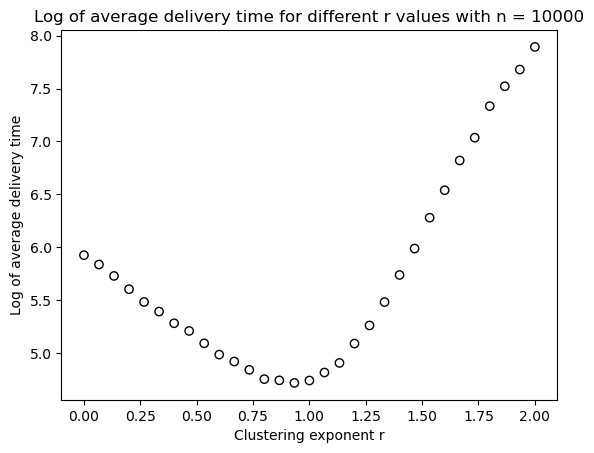

In [1]:
import numpy as np
import matplotlib.pyplot as plt

results = [
    (0.0, 374.2266666666667),
    (0.06666666666666667, 342.49),
    (0.13333333333333333, 307.52),
    (0.2, 271.24),
    (0.26666666666666666, 240.39333333333335),
    (0.3333333333333333, 219.63),
    (0.4, 196.60666666666665),
    (0.4666666666666667, 182.84333333333333),
    (0.5333333333333333, 162.62333333333333),
    (0.6, 146.16333333333333),
    (0.6666666666666666, 136.97),
    (0.7333333333333333, 126.59),
    (0.8, 115.92666666666666),
    (0.8666666666666667, 114.65),
    (0.9333333333333333, 111.87),
    (1.0, 114.46333333333334),
    (1.0666666666666667, 123.43),
    (1.1333333333333333, 135.13),
    (1.2, 162.27666666666667),
    (1.2666666666666666, 192.56),
    (1.3333333333333333, 240.19),
    (1.4, 310.31666666666666),
    (1.4666666666666666, 398.27666666666664),
    (1.5333333333333332, 533.3233333333334),
    (1.6, 691.34),
    (1.6666666666666667, 915.8766666666667),
    (1.7333333333333334, 1135.9566666666667),
    (1.8, 1530.6066666666666),
    (1.8666666666666667, 1846.4566666666667),
    (1.9333333333333333, 2162.8233333333333),
    (2.0, 2678.4166666666665)
]

rs, lengths = zip(*results)
log_lengths = np.log(lengths)

# Creating the scatter plot
plt.scatter(rs, log_lengths, facecolors='none', edgecolors='black')
plt.xlabel('Clustering exponent r')
plt.ylabel('Log of average delivery time')
plt.title('Log of average delivery time for different r values with n = 10000')
plt.show()